<a href="https://colab.research.google.com/github/Angsumi/DOMESTICATION_URBANIZATION/blob/main/ReviewPaper_Gutmicrobes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the Excel file
xls = pd.ExcelFile('/content/DATA.xlsx')

# Get the sheet names to understand the structure
sheet_names = xls.sheet_names
sheet_names


['Domestication', 'Urbanization', 'Human', 'Sheet1']

In [7]:
# Load the content of each sheet
domestication_data = xls.parse('Domestication')
urbanization_data = xls.parse('Urbanization')
human_data = xls.parse('Human')

# Display the first few rows of each sheet to get a sense of the data
domestication_data.head(), urbanization_data.head(), human_data.head()


(  Animal  Wild Shannon  Domestic Shannon  \
 0   Gaur          4.23              3.98   
 1    Yak         11.00              9.90   
 2  Rhino          4.40              3.80   
 3  Horse          8.70              8.20   
 
                                        Reference API  \
 0  Prabhu, V. R., Wasimuddin, Kamalakkannan, R., ...   
 1  Fu, H., Zhang, L., Fan, C., Liu, C., Li, W., L...   
 2  Gibson, K. M., Nguyen, B. N., Neumann, L. M., ...   
 3  Metcalf, J. L., Song, S. J., Morton, J. T., We...   
 
                                           DOI  \
 0    https://doi.org/10.3389/fmicb.2020.00133   
 1                                         NaN   
 2  https://doi.org/10.1038/s41598-019-43875-3   
 3  https://doi.org/10.1038/s41598-017-15375-9   
 
                                   Unnamed: 5  
 0                                        NaN  
 1  https://doi.org/10.3389/fmicb.2021.594075  
 2                                        NaN  
 3                                        

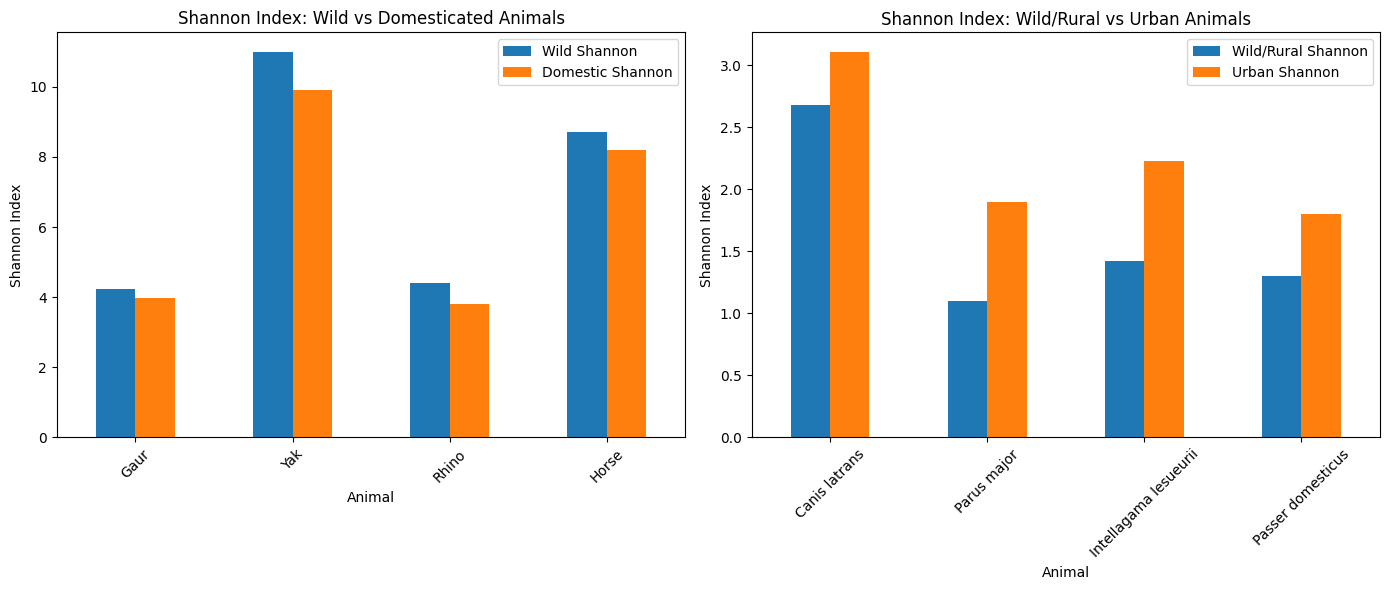

In [3]:
import matplotlib.pyplot as plt

# Bar plots for Domestication
plt.figure(figsize=(14, 6))

# Plot for wild vs domesticated Shannon index
plt.subplot(1, 2, 1)
domestication_data.set_index('Animal')[['Wild Shannon', 'Domestic Shannon']].plot(kind='bar', ax=plt.gca())
plt.title('Shannon Index: Wild vs Domesticated Animals')
plt.ylabel('Shannon Index')
plt.xticks(rotation=45)

# Difference in Shannon index for domestication
domestication_data['Difference (Domestication)'] = domestication_data['Domestic Shannon'] - domestication_data['Wild Shannon']

# Bar plots for Urbanization
plt.subplot(1, 2, 2)
urbanization_data.set_index('Animal')[['Wild/Rural Shannon', 'Urban Shannon']].plot(kind='bar', ax=plt.gca())
plt.title('Shannon Index: Wild/Rural vs Urban Animals')
plt.ylabel('Shannon Index')
plt.xticks(rotation=45)

# Difference in Shannon index for urbanization
urbanization_data['Difference (Urbanization)'] = urbanization_data['Urban Shannon'] - urbanization_data['Wild/Rural Shannon']

plt.tight_layout()
plt.show()


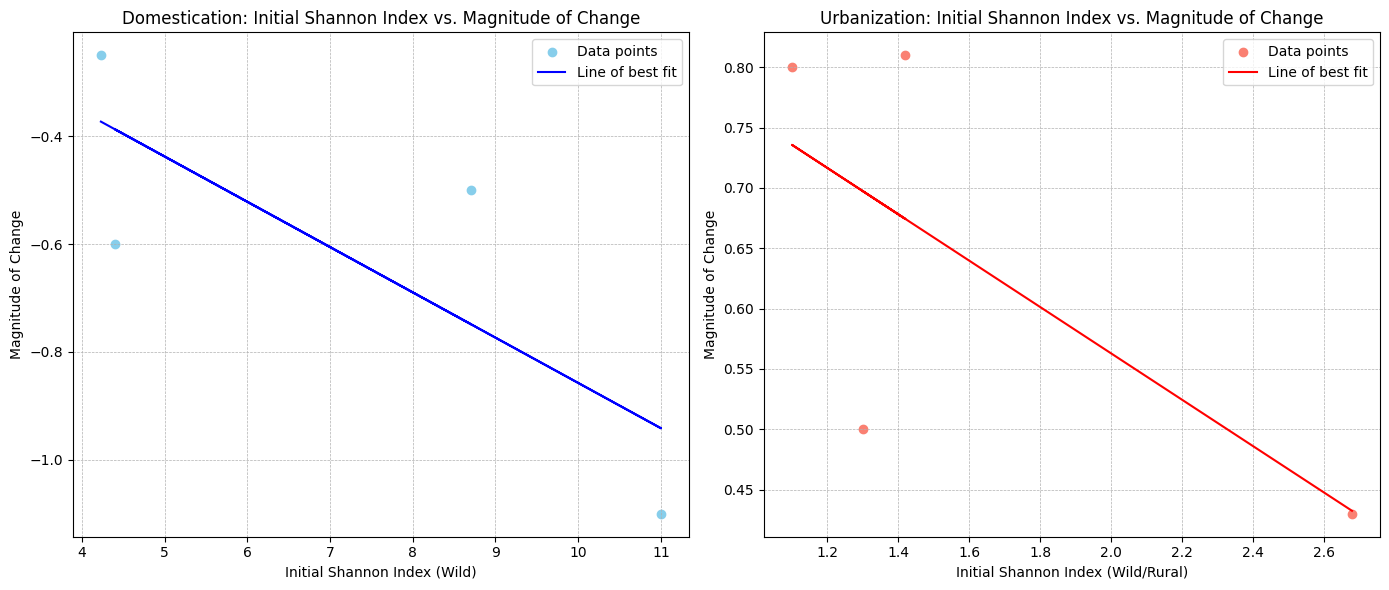

In [4]:
import numpy as np

# Function to get line of best fit
def best_fit_slope_and_intercept(xs, ys):
    m = (((np.mean(xs) * np.mean(ys)) - np.mean(xs * ys)) /
         ((np.mean(xs) ** 2) - np.mean(xs * xs)))
    b = np.mean(ys) - m * np.mean(xs)
    return m, b

# Getting line of best fit for Domestication
m_domestication, b_domestication = best_fit_slope_and_intercept(domestication_data['Wild Shannon'], domestication_data['Difference (Domestication)'])
regression_line_domestication = [(m_domestication * x) + b_domestication for x in domestication_data['Wild Shannon']]

# Getting line of best fit for Urbanization
m_urbanization, b_urbanization = best_fit_slope_and_intercept(urbanization_data['Wild/Rural Shannon'], urbanization_data['Difference (Urbanization)'])
regression_line_urbanization = [(m_urbanization * x) + b_urbanization for x in urbanization_data['Wild/Rural Shannon']]

# Plotting correlation with lines of best fit
plt.figure(figsize=(14, 6))

# Plot for Domestication
plt.subplot(1, 2, 1)
plt.scatter(domestication_data['Wild Shannon'], domestication_data['Difference (Domestication)'], color='skyblue', label='Data points')
plt.plot(domestication_data['Wild Shannon'], regression_line_domestication, color='blue', label='Line of best fit')
plt.title('Domestication: Initial Shannon Index vs. Magnitude of Change')
plt.xlabel('Initial Shannon Index (Wild)')
plt.ylabel('Magnitude of Change')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

# Plot for Urbanization
plt.subplot(1, 2, 2)
plt.scatter(urbanization_data['Wild/Rural Shannon'], urbanization_data['Difference (Urbanization)'], color='salmon', label='Data points')
plt.plot(urbanization_data['Wild/Rural Shannon'], regression_line_urbanization, color='red', label='Line of best fit')
plt.title('Urbanization: Initial Shannon Index vs. Magnitude of Change')
plt.xlabel('Initial Shannon Index (Wild/Rural)')
plt.ylabel('Magnitude of Change')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()


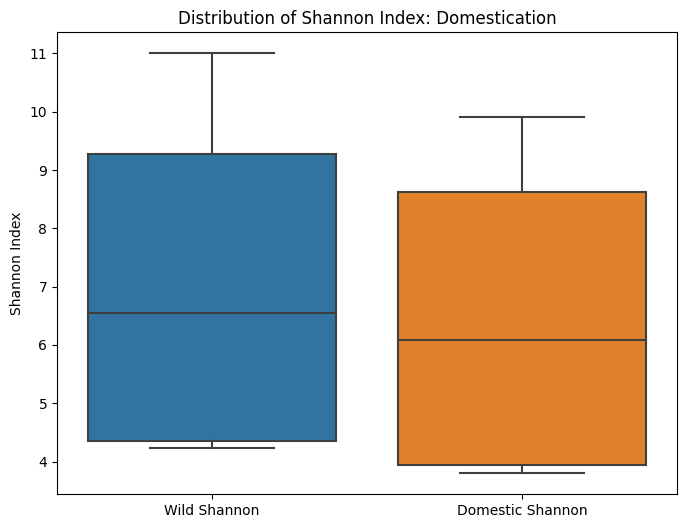

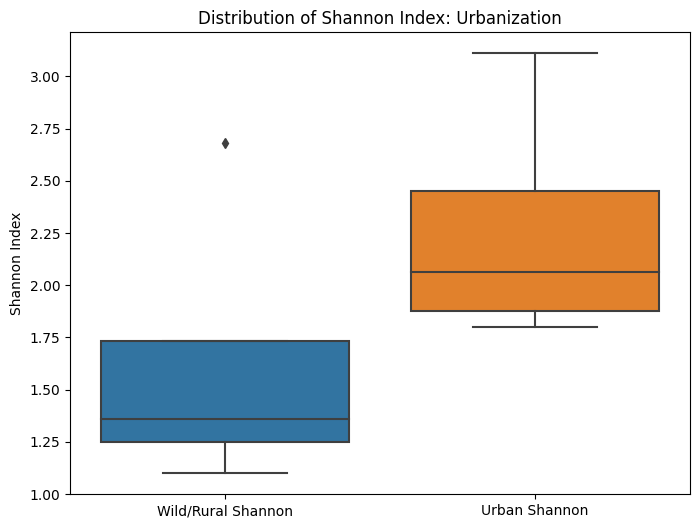

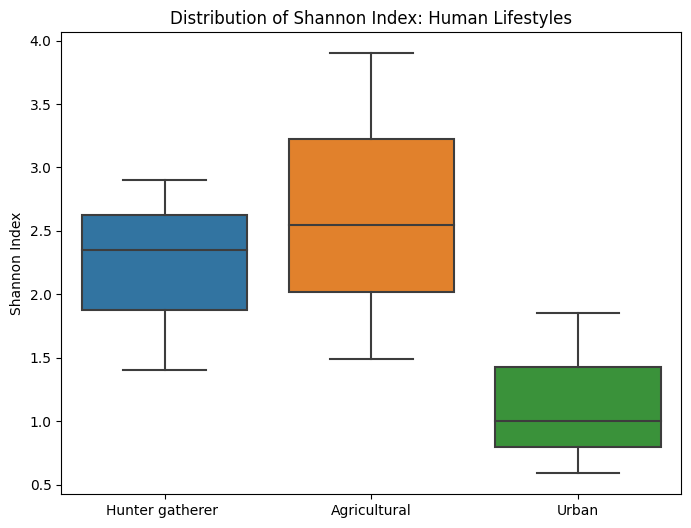

In [8]:
import seaborn as sns
# Boxplot for Domestication
plt.figure(figsize=(8, 6))
sns.boxplot(data=domestication_data[['Wild Shannon', 'Domestic Shannon']])
plt.title('Distribution of Shannon Index: Domestication')
plt.ylabel('Shannon Index')
plt.show()

# Boxplot for Urbanization
plt.figure(figsize=(8, 6))
sns.boxplot(data=urbanization_data[['Wild/Rural Shannon', 'Urban Shannon']])
plt.title('Distribution of Shannon Index: Urbanization')
plt.ylabel('Shannon Index')
plt.show()

# Boxplot for Human Data
plt.figure(figsize=(8, 6))
sns.boxplot(data=human_data[['Hunter gatherer ', 'Agricultural', 'Urban']])
plt.title('Distribution of Shannon Index: Human Lifestyles')
plt.ylabel('Shannon Index')
plt.show()


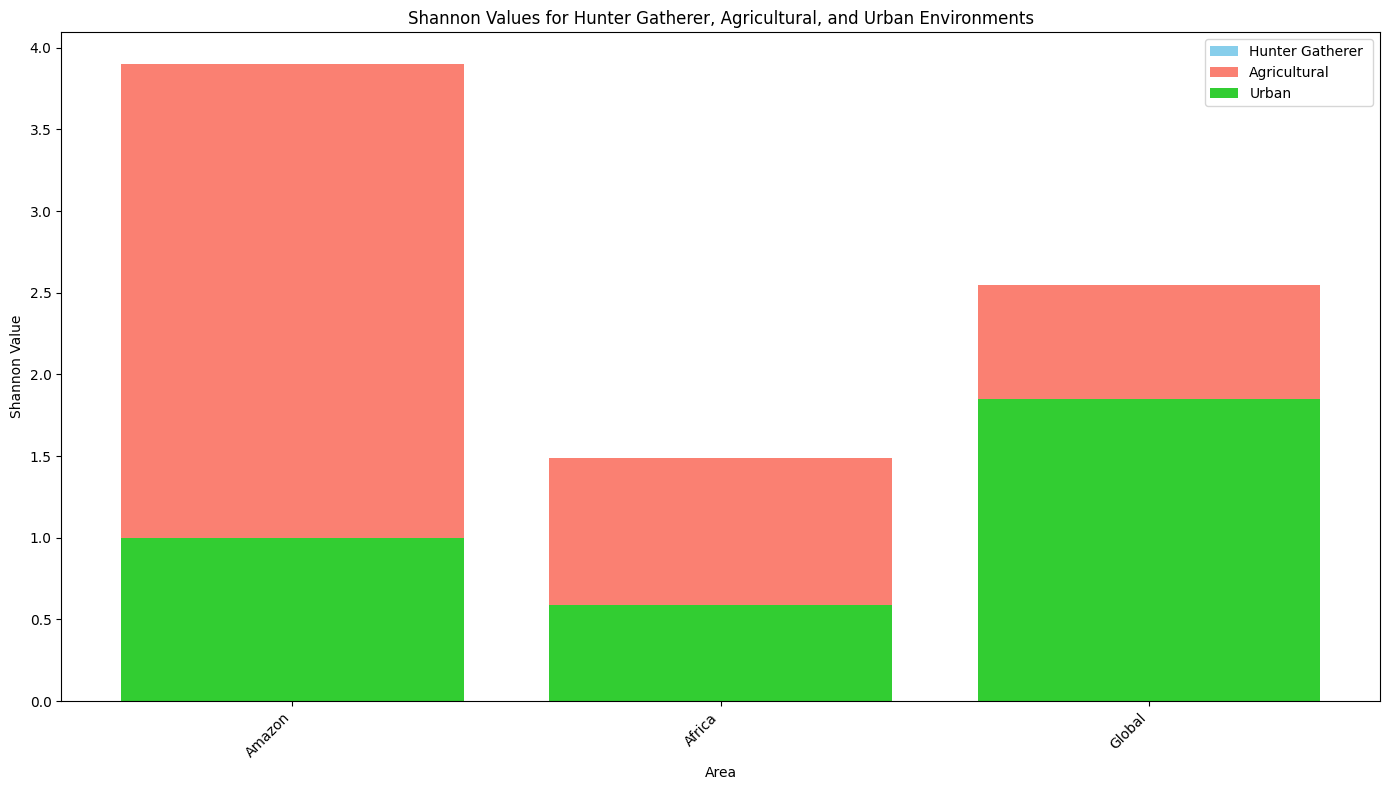

In [19]:
# Creating the bar plot for the 3rd sheet without gaps between bars
fig8, ax8 = plt.subplots(figsize=(14, 8))
x3_without_gap = np.arange(len(human_data["Area"]))
bars1_8 = ax8.bar(x3_without_gap, human_data["Hunter gatherer "], label='Hunter Gatherer ', color='skyblue')
bars2_8 = ax8.bar(x3_without_gap, human_data["Agricultural"], label='Agricultural', color='salmon')
bars3_8 = ax8.bar(x3_without_gap, human_data["Urban"], label='Urban', color='limegreen')

ax8.set_xlabel('Area')
ax8.set_ylabel('Shannon Value')
ax8.set_title('Shannon Values for Hunter Gatherer, Agricultural, and Urban Environments')
ax8.set_xticks(x3_without_gap)
ax8.set_xticklabels(human_data["Area"], rotation=45, ha='right')
ax8.legend()

fig8.tight_layout()

plt.show()


In [22]:

df1 = human_data.iloc[:, [0, 1, 2]]
df2 = human_data.iloc[:, [0, 2, 3]]

df1.head(), df2.head()

# Calculating the magnitude of change for both dataframes
df1['Magnitude of Change'] = df1['Agricultural'] - df1['Hunter gatherer ']
df2['Magnitude of Change'] = df2['Urban'] - df2['Agricultural']

# Performing correlation tests
corr1 = df1['Hunter gatherer '].corr(df1['Magnitude of Change'])
corr2 = df2['Agricultural'].corr(df2['Magnitude of Change'])

corr1, corr2


<ipython-input-22-4ac46ebaa6d7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Magnitude of Change'] = df1['Agricultural'] - df1['Hunter gatherer ']
<ipython-input-22-4ac46ebaa6d7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Magnitude of Change'] = df2['Urban'] - df2['Agricultural']


(0.8443751371693012, -0.8594881352434253)

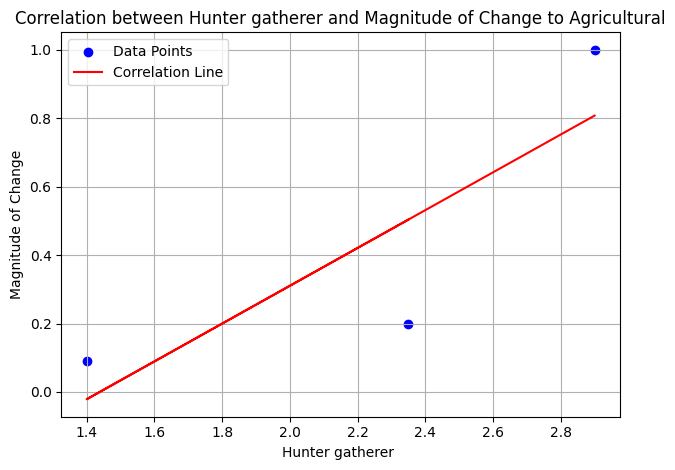

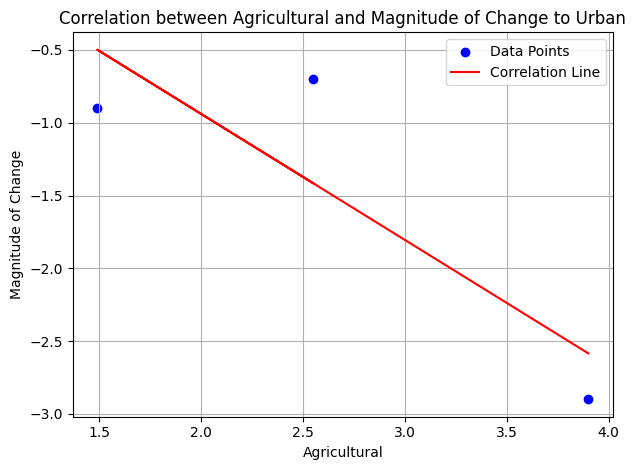

In [23]:
# Function to create correlation plots for the dataframes
def plot_correlation(df, initial_col, change_col, title):
    plt.scatter(df[initial_col], df['Magnitude of Change'], label='Data Points', color='blue')
    m, b = np.polyfit(df[initial_col], df['Magnitude of Change'], 1)
    plt.plot(df[initial_col], m*df[initial_col] + b, color='red', label='Correlation Line')
    plt.title(title)
    plt.xlabel(initial_col)
    plt.ylabel('Magnitude of Change')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plotting for DataFrame 1
plot_correlation(df1, 'Hunter gatherer ', 'Agricultural', 'Correlation between Hunter gatherer and Magnitude of Change to Agricultural')

# Plotting for DataFrame 2
plot_correlation(df2, 'Agricultural', 'Urban', 'Correlation between Agricultural and Magnitude of Change to Urban')
